In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
df = pd.read_csv("../input/graduate-admissions/Admission_Predict.csv")
print (df.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


Checking for null values and reset index to "Serial No."

In [3]:
print(df.isnull().sum())
df = df.set_index(df["Serial No."])
df = df.drop("Serial No.", axis = 1)

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


Some of the columns seem to have spaces in their names, our code would be more efficient if they were removed. We remove them using the .rename() function.

In [4]:
df.rename(columns={'Chance of Admit ': 'Chance of Admit', 'LOR ': 'LOR'}, inplace=True)
print(df.head())

            GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
Serial No.                                                              
1                 337          118                  4  4.5  4.5  9.65   
2                 324          107                  4  4.0  4.5  8.87   
3                 316          104                  3  3.0  3.5  8.00   
4                 322          110                  3  3.5  2.5  8.67   
5                 314          103                  2  2.0  3.0  8.21   

            Research  Chance of Admit  
Serial No.                             
1                  1             0.92  
2                  1             0.76  
3                  1             0.72  
4                  1             0.80  
5                  0             0.65  


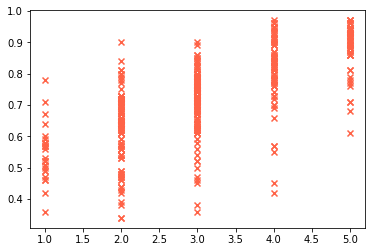

In [5]:
plt.scatter(df["University Rating"], df["Chance of Admit"], color = "tomato", marker = "x")
plt.show()

The plot shows that Universities with a higher ranking tend to have higher chance of acceptance of vice versa.

Now, a function to check for Outliers. The outliers are then stored in a dictionary. Since the outliers are not very extreme, no specific action is carried out.

In [6]:
def remove_outliers(column):

    q25, q50, q75 = np.percentile(df[column], [25, 70, 75])
    iqr = q75 - q25
    min = q25 - 1.5 * (iqr)
    max = q75 + 1.5 * (iqr)
    outliers = [x for x in df[column] if x > max or x < min]
    return (column,outliers)


outliers_dict={}
for column in df.columns:
    column, outliers = remove_outliers(column)
    outliers_dict.update( {column : outliers} )
print(outliers_dict)

{'GRE Score': [], 'TOEFL Score': [], 'University Rating': [], 'SOP': [], 'LOR': [1.0], 'CGPA': [6.8], 'Research': [], 'Chance of Admit': [0.34, 0.34]}


To visualize the spotted outliers, we can use boxplots and density maps. These plots also allow us to see how the data is centered and in which specific values the data is more frequent, or rather more dense.

<AxesSubplot:xlabel='Chance of Admit', ylabel='LOR'>

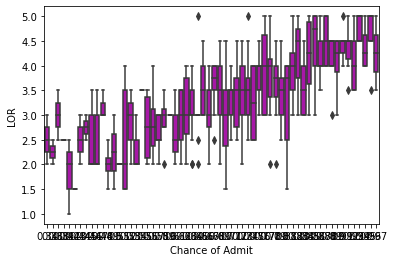

In [7]:
sns.boxplot(y="LOR",x ="Chance of Admit",palette=["m"],data=df)


<AxesSubplot:xlabel='Chance of Admit', ylabel='CGPA'>

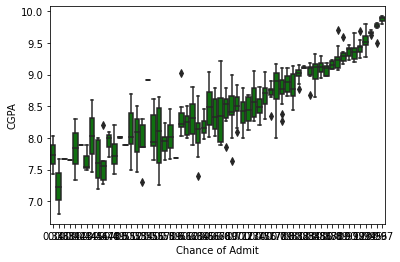

In [8]:
sns.boxplot(y="CGPA",x ="Chance of Admit",palette=["g"],data=df)


<AxesSubplot:xlabel='LOR', ylabel='Chance of Admit'>

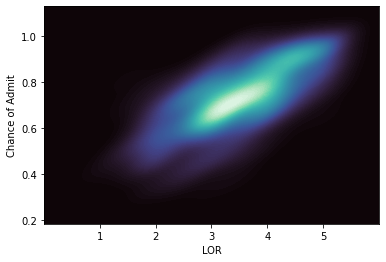

In [9]:
sns.kdeplot(x = "LOR", y = "Chance of Admit", data = df, fill = True,thresh=0, levels=100, cmap="mako")

Here, the plot shows that the data is more dense at values between 3 and 4 for LOR and 0.6-0.8 for chance of admit

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit'>

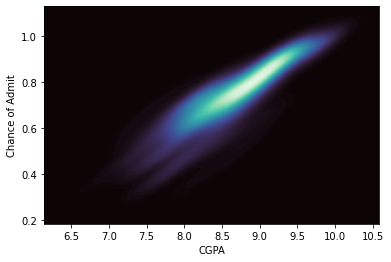

In [10]:
sns.kdeplot(x = "CGPA", y = "Chance of Admit", data = df, fill = True,thresh=0, levels=100, cmap="mako")


Similarly, here the plot shows that the data is more dense at values between 8.5-9.5 for CGPA and around the region of 0.8 for chance of admit

<AxesSubplot:xlabel='GRE Score', ylabel='TOEFL Score'>

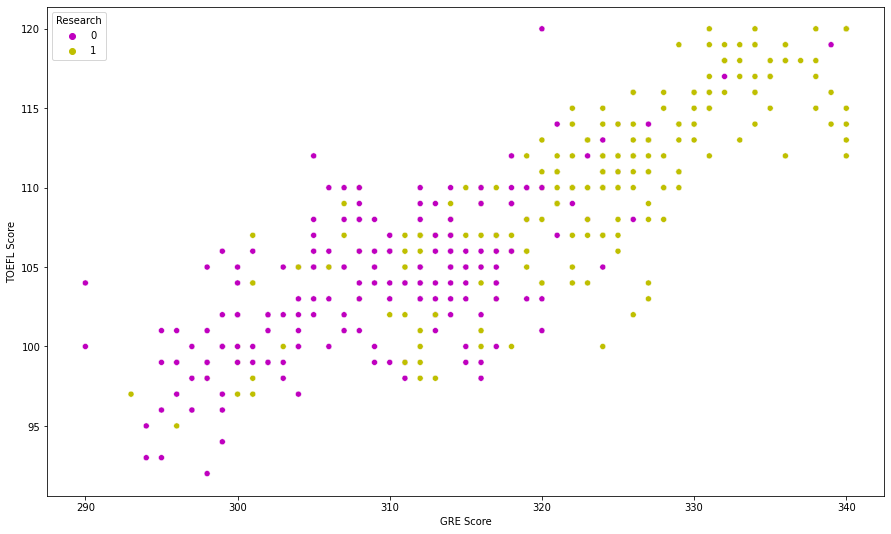

In [11]:
plt.figure(figsize=(15, 9))
sns.scatterplot(x='GRE Score', y='TOEFL Score', hue='Research', data=df, palette= ["m","y"])

This plot shows that students with higher GRE and TOEFL Scores are more inclined to do research.

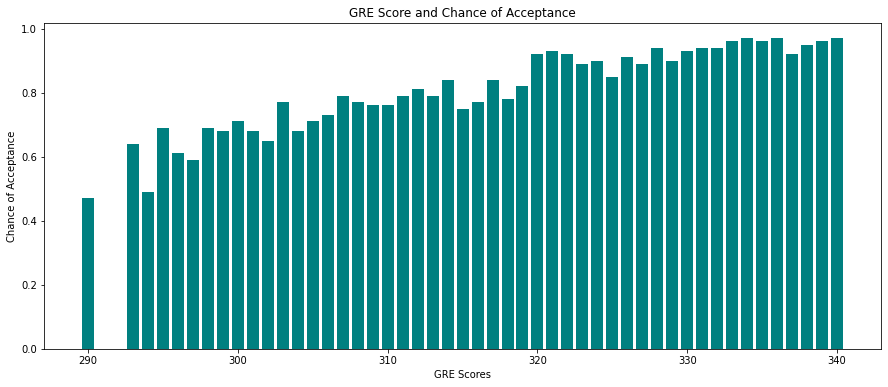

In [12]:
plt.figure(figsize=(15, 6))
plt.bar(df["GRE Score"], df["Chance of Admit"], color = "teal")
plt.title("GRE Score and Chance of Acceptance")
plt.xlabel("GRE Scores")
plt.ylabel("Chance of Acceptance")
plt.show()

The plot indicates the general trend of increase in rate of admittance with increase in GRE Scores. 

<AxesSubplot:xlabel='Chance of Admit', ylabel='Density'>

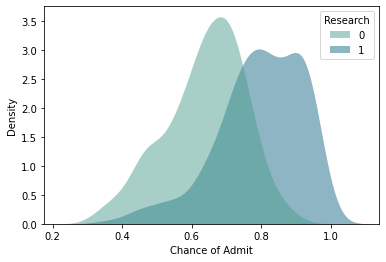

In [13]:
sns.kdeplot(
   data=df, x="Chance of Admit",hue = "Research",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

This density plot shows us two things:
1. The chance of admit is greater for research students
2. Non- research students have around 70% chance of admittance 

Now, we can apply binary encoding to the target column "Chance of admit" such that the new variable "Admitted" is true if chance of admit is greater than or equal to 0.65 and is false if it is less.

In [14]:
def encode_chance(data):
    if data >= 0.65:
        return 1
    else:
        return 0
df['Admitted'] = df['Chance of Admit'].apply(encode_chance)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
Serial No.,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,1
2,324,107,4,4.0,4.5,8.87,1,0.76,1
3,316,104,3,3.0,3.5,8.00,1,0.72,1
4,322,110,3,3.5,2.5,8.67,1,0.80,1
5,314,103,2,2.0,3.0,8.21,0,0.65,1


To see how many students are admitted:

In [15]:
print(df["Admitted"].sum())
print(df.shape)

287
(400, 9)


With a probability threshold of 0.65, we get 287 / 400 admitted. To lower the number of admitted students, we may increase the threshold. But for now, let's analyze the admittance in relation to the attributes in our dataset.

<AxesSubplot:>

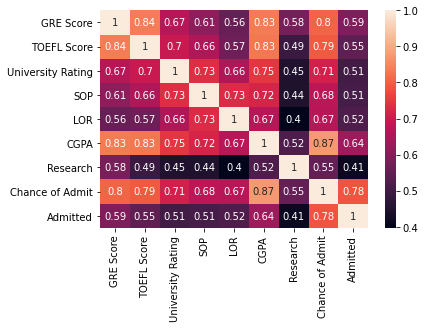

In [16]:
sns.heatmap(df.corr(), annot=True)

The correlation plot shows the GRE, TOEFL Scores and CGPA play the major roles in deciding admittance to a college.

In [17]:
my_df = df.copy()
my_df["University Rating"] = df.loc[df["University Rating"] < 3.0]
my_df = my_df.dropna()
print(len(my_df))
print(my_df.Admitted.sum())

133
55


Therefore admittance in a university with ranking less than 3.0 can be said to have a probability of 55/133 = 0.413
If X is the random variable representing "The number of students accepted in a university with ranking less than 3", then X ~ B(133, 0.413)

Hypothesis 3: Most of the students choose Universities woth ranking less than 3.0 as their "safety colleges", meaning that they are more likely to be accepted in these universities. In a sample of 100 students, how close to 80% is their likelihood of getting into a safety college?

H0: 80% or more students get admitted<br>
H1: Less than 80% students get admitted

In [18]:
siglevel = 0.05
from scipy.stats import binom

prob = 1 - binom.cdf(80, 100, 0.413)
if prob > siglevel:
    print(" Null accepted")
else: 
    print("Null rejected")


Null rejected


The test shows evidence to suggest that less than 80% of the students get admitted. The null hypothesis here is rejected.

In [19]:
df2 = df.copy()
def add_deviation_feature(X, category, feature):
    category_gb = X.groupby(category)[feature]
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    deviation_feature = (X[feature] - category_mean)/ category_std
    X[feature + "_Dev_"] = deviation_feature

add_deviation_feature(df2, "Admitted", "TOEFL Score")
add_deviation_feature(df2, "Admitted", "GRE Score")
add_deviation_feature(df2, "Admitted", "CGPA")
df2 = df2.drop("University Rating", axis = 1)

In [20]:
df3 = df2.copy()
print(df3["CGPA"].median())
print(df3["GRE Score"].mean())
print(df3["GRE Score"].std())
df3["CGPA"] = df2.loc[df2["CGPA"] >= 8.6]
df3 = df3.dropna()
df3 = df3.groupby(by = "Admitted")
print(df3.CGPA.count())

8.61
316.8075
11.473646113500475
Admitted
0      8
1    194
Name: CGPA, dtype: int64


Among 202 students who scored a CGPA greater than the median value of 8.61, 194 were admitted. Thus the chance of rejection here can be said to be 8/202 = 0.034.

 <br> 

**Hypotheses 1: If the rejection probabilty prevails for all students, even a quarter of the students may not be accepted<br>**
 <br>
Let X be the random variable "The number of students who are accepted"<br> 
X ~ B(100, 0.034) <br>
H0( The null hypothesis) : Quarter or more of the students are rejected<br> 
The alternate hypothesis: Less than quarter are rejected <br>
We test this with a significance level of 10%

In [21]:
from scipy.stats import binom

siglevel = 0.10
prob = binom.cdf(99, 400, 0.034)
print("probabilty of less than quarter rejected", prob)
prob2 = binom.sf(100, 400, 0.034)
print("probabilty of quarter or more than quarter rejected", prob2)

if prob2 > siglevel:
    print( "Null Accepted")
else: 
    print(" Null Rejected")


probabilty of less than quarter rejected 0.9999999999999999
probabilty of quarter or more than quarter rejected 1.1432901296154554e-56
 Null Rejected


If the rejection probability prevails in the entire dataset, Evidence shows that, Quarter or more of the students are not rejected. Here, the null hypothesis stands True.

**Hypothesis 2 : The number of samples taken influences the distribution of the samples.** <br>
 <br>
The null hypothesis: The number of samples does not affect the distribution of the sample. <br>
The alternate hypothesis: The number of samples taken affects the distribution of the sample <br>
The hypothesis is tested at a significance level of 5% 

In [22]:
from scipy.stats import ttest_ind
data1 = df2.sample(n = 40, replace = False)["GRE Score"]
data2 = df2.sample(n = 200, replace = False)["GRE Score"]
stat, p = ttest_ind(data1, data2)
print(stat, p)
print('stat = %.3f, p = %.3f' % (stat, p))
if p > 0.05:
    print('Same distribution')
else:
    print('Different distributions')

-0.7389255608356471 0.4606802989412728
stat = -0.739, p = 0.461
Same distribution


The hypothesis test shows that the number of samples does not affect the distribution of the sample. The null hypothesis is accepted.
